# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task. 
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward. 


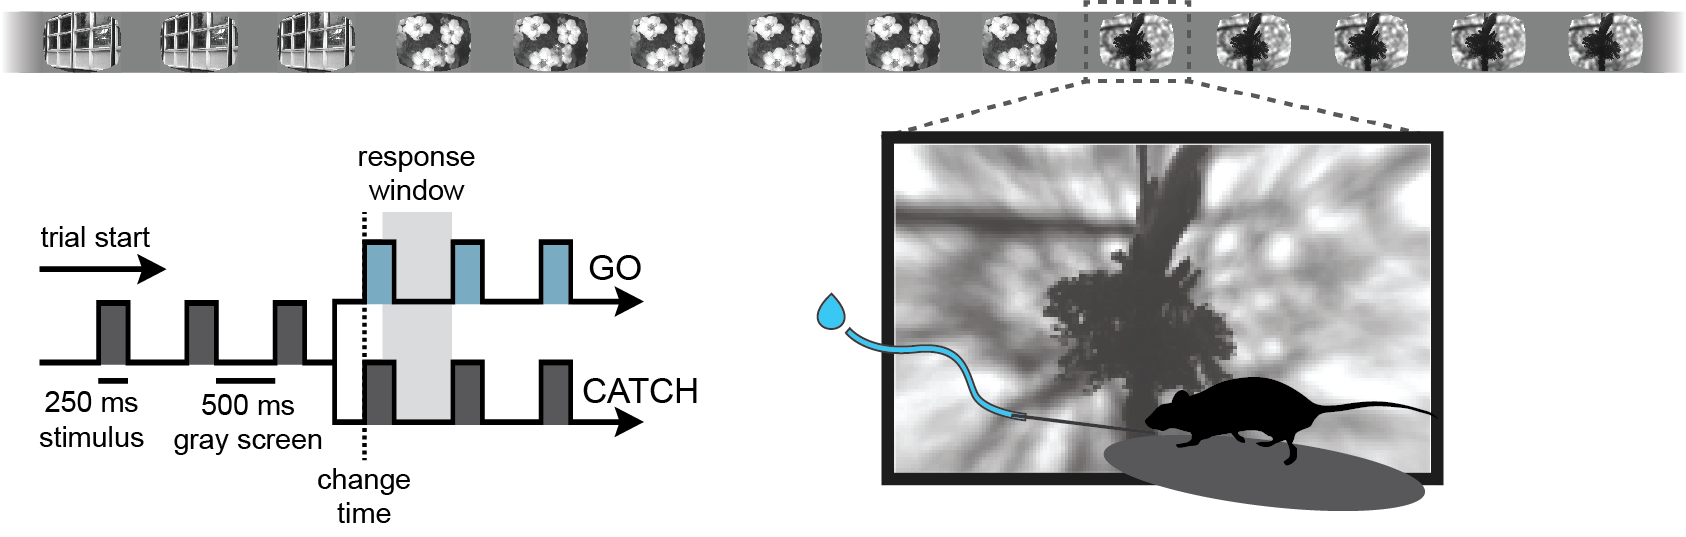

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images. 
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


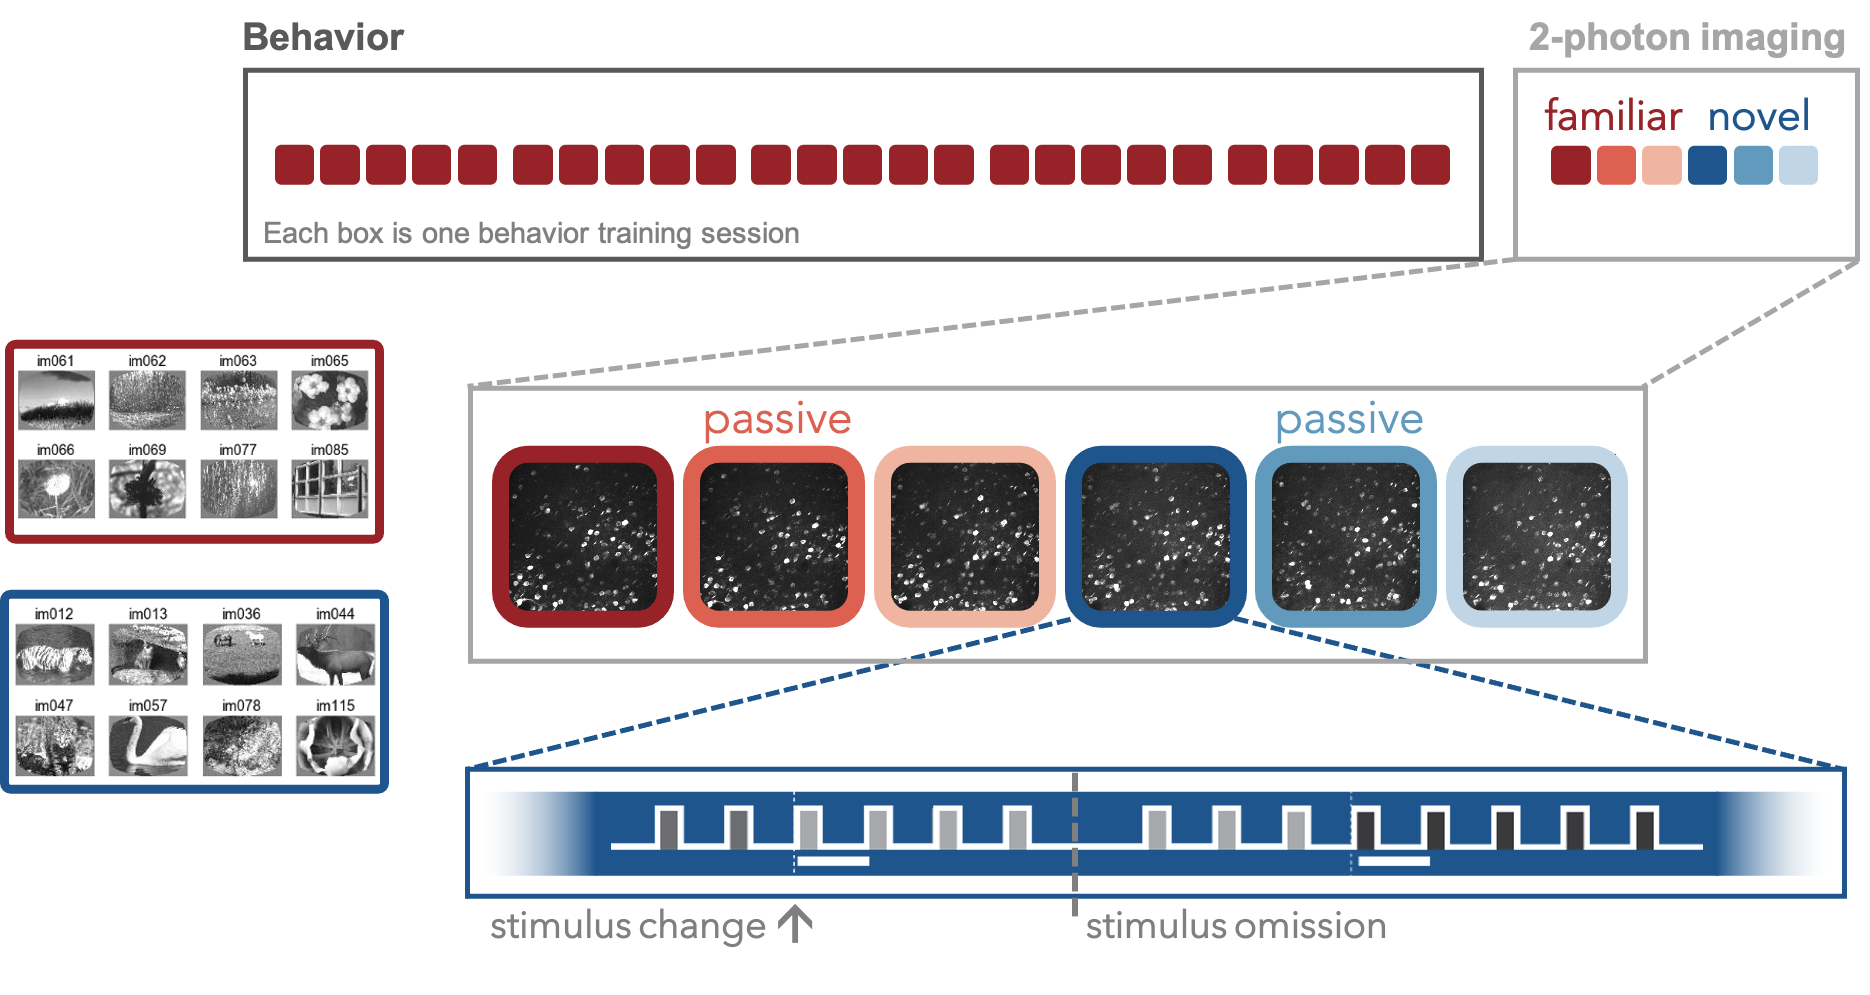

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.
 

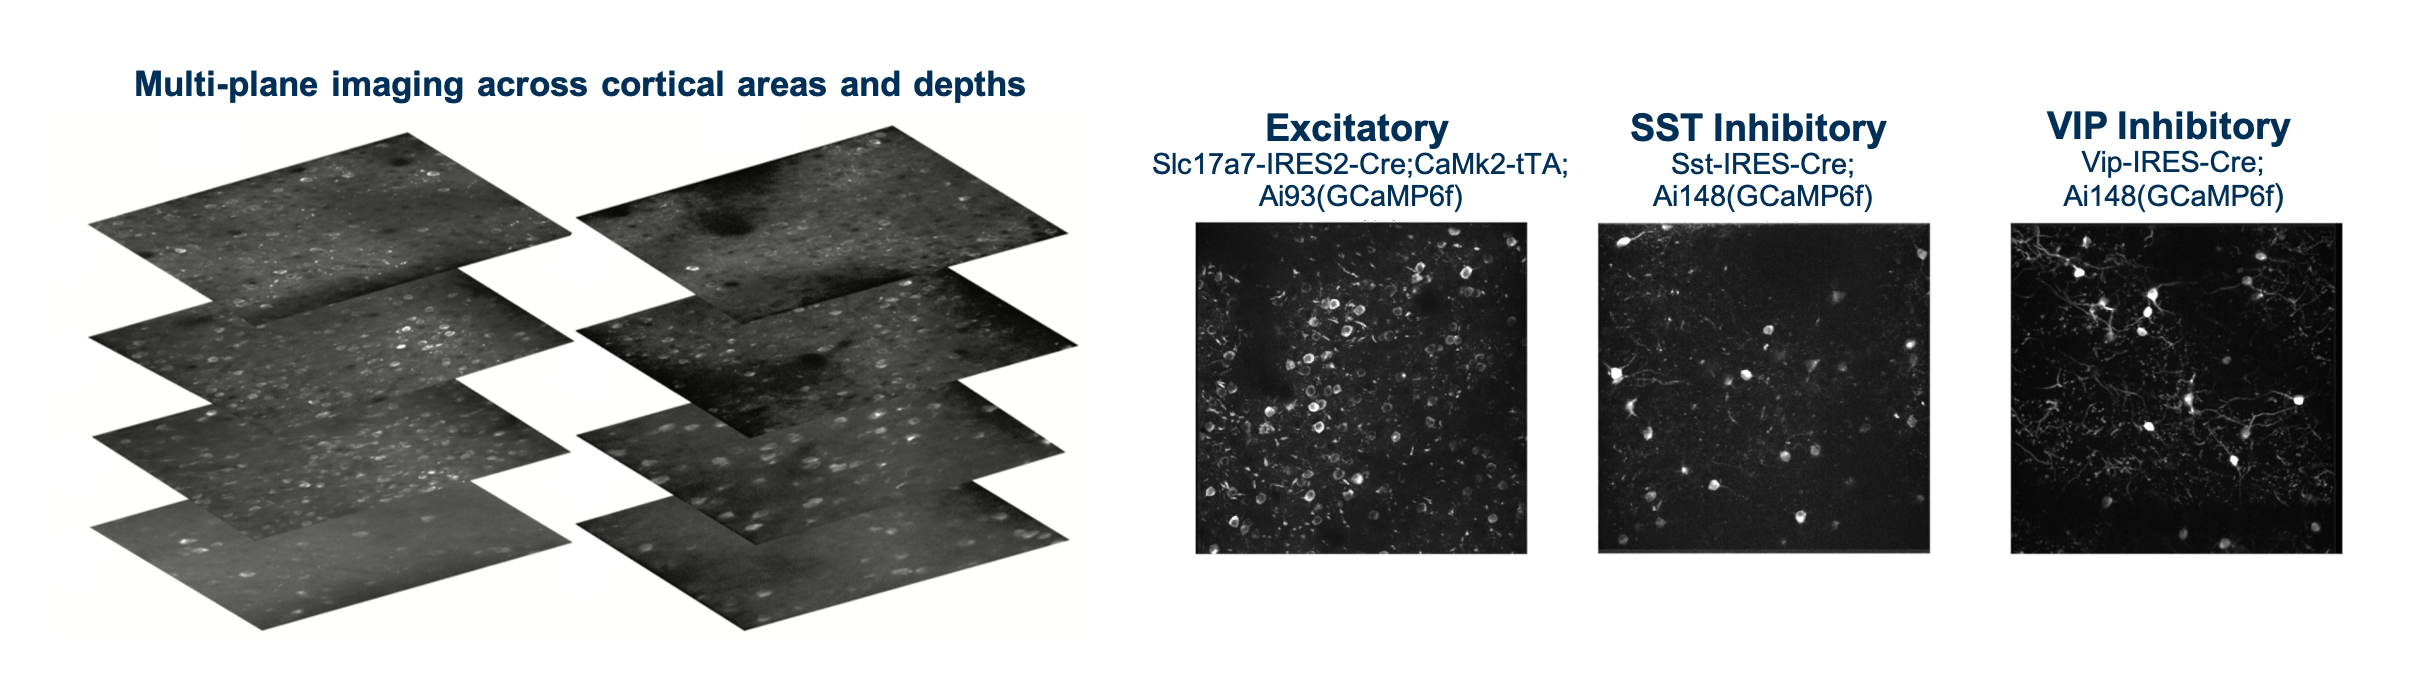

#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

##### import necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare. 
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [ ]:
!wget --content-disposition https://ndownloader.figshare.com/files/28470255

--2021-06-18 01:09:19--  https://ndownloader.figshare.com/files/28470255
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.16.102.173, 54.217.124.219, 2a05:d018:1f4:d003:1c8b:1823:acce:812, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.16.102.173|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/28470255/allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet [following]
--2021-06-18 01:09:20--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/28470255/allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.98.131
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.98.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78740247 (75M) [application/octet-stream]
Saving to: ‘allen_visual_behavior

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [ ]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [ ]:
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,mean_running_speed,mean_pupil_area,response_latency,rewarded,ophys_experiment_id,imaging_depth,targeted_structure,cre_line,session_type,session_number,mouse_id,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
713266,3859,1086490784,"[0.004787824582308531, 0.17403070628643036, 0....","[-1.2278459028873827, -1.1955341686008727, -1....",0.206258,-0.062327,im045,4,True,False,0.038398,3301.041613,NaN,False,957652800,275,VISp,Sst-IRES-Cre,OPHYS_3_images_B,3.0,470784,957189583,941373529,957331258,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,F,151.0,familiar
336957,1626,1086495538,"[-0.04117368534207344, -0.03946039825677872, 0...","[-1.2281102725749526, -1.1957915811914013, -1....",0.067763,0.032863,im045,4,True,False,24.399806,6292.680291,0.61758,True,967876201,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,467953,967200850,957570596,967449308,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,M,182.0,familiar
805448,4178,1086490572,"[-0.061578571796417236, 0.02603892795741558, -...","[-1.2281362613749274, -1.1958168860755871, -1....",0.054921,0.017746,omitted,8,False,True,2.476659,10531.936381,NaN,False,992870927,275,VISp,Sst-IRES-Cre,OPHYS_3_images_B,3.0,485688,992783847,989461845,992815106,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,145.0,familiar
1470841,2782,1086556696,"[-0.015906184911727905, 0.11068834364414215, 0...","[-1.2282367960132226, -1.1959147750655061, -1....",0.007814,0.008226,im065,0,True,False,22.579399,6021.672497,NaN,False,1005123568,175,VISp,Vip-IRES-Cre,OPHYS_4_images_A,4.0,492395,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
677844,1891,1086491469,"[0.04860144481062889, -0.045867517590522766, -...","[-1.2278459028873827, -1.1955341686008727, -1....",0.062377,-0.018223,im073,3,True,False,0.041356,2874.236112,NaN,False,957652800,275,VISp,Sst-IRES-Cre,OPHYS_3_images_B,3.0,470784,957189583,941373529,957331258,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,F,151.0,familiar



##### Available data includes: 
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline 
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes: 

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type 
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`. 


 

### Let's check what is available


In [ ]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [ ]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [ ]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [ ]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [ ]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [ ]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset



# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line=='Sst-IRES-Cre')&(data.is_change==True)]
vip_data = data[(data.cre_line=='Vip-IRES-Cre')&(data.is_change==True)]

Plot the population average change response of SST cells for familiar and novel images

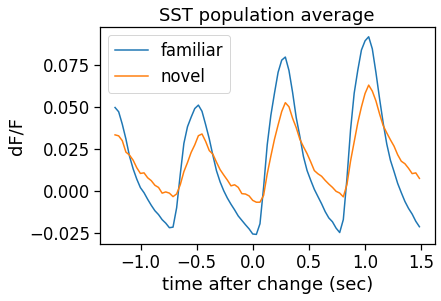

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
    traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
    plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()

Plot the population average change response of VIP cells for familiar and novel images

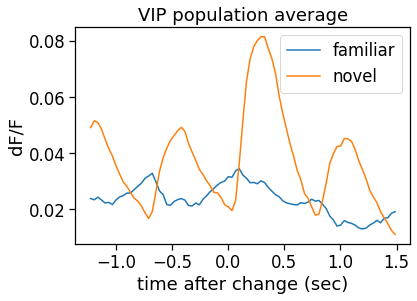

In [ ]:
timestamps = vip_data.trace_timestamps.values[0] 
for exposure_level in vip_data.exposure_level.unique():
    traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
    plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set? 

In [ ]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id==cell_specimen_id].ophys_session_id.unique())>1:
    cells_in_multiple_sessions.append(cell_specimen_id)
    
print(cells_in_multiple_sessions)

[1086495458, 1086495538, 1086495170, 1086495264, 1086496225, 1086495925, 1086495377, 1086496359, 1086496472, 1086496547, 1086496681, 1086497031, 1086496844, 1086500839, 1086500898, 1086500959, 1086501038, 1086501134, 1086501280, 1086501226, 1086501454, 1086501538, 1086501601, 1086501688, 1086489847, 1086489860, 1086489891, 1086558904, 1086556416, 1086555432, 1086559188, 1086555190, 1086567589, 1086559446, 1086567897, 1086558341, 1086556696, 1086561830, 1086557997, 1086559782, 1086560048, 1086567017, 1086557082, 1086556094, 1086563032, 1086563829, 1086560926, 1086561466, 1086562430, 1086560592, 1086566230, 1086566746, 1086563384, 1086562780, 1086565528, 1086497765, 1086498401, 1086498125, 1086499101, 1086498544, 1086498699, 1086498800, 1086498889, 1086498976]


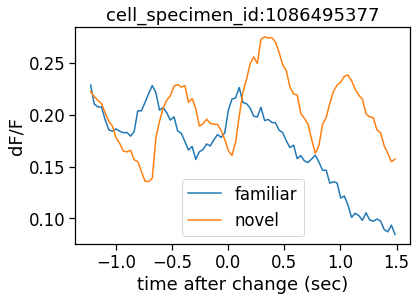

In [ ]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0] 
for exposure_level in cell_data.exposure_level.unique():
    mean_trace = cell_data[cell_data.exposure_level==exposure_level].trace.mean()
    plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title('cell_specimen_id:'+str(example_cell_specimen_id))
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()

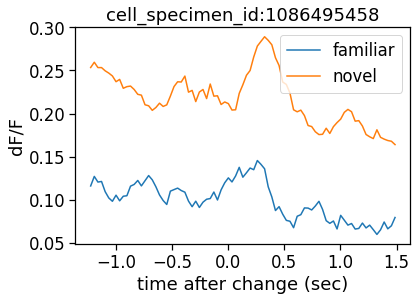

In [ ]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0] 
for exposure_level in cell_data.exposure_level.unique():
    mean_trace = cell_data[cell_data.exposure_level==exposure_level].trace.mean()
    plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title('cell_specimen_id:'+str(example_cell_specimen_id))
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()

### What about trial to trial variability? How does the response of a single cell vary across a session?



Text(0, 0.5, 'dF/F')

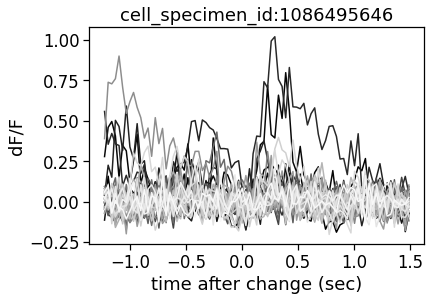

In [ ]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1/len(cell_data.stimulus_presentations_id.unique())
color = [0,0,0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id==stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0] 
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0]+offset, color[1]+offset, color[2]+offset]
plt.title('cell_specimen_id:'+str(example_cell_specimen_id))
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line=='Sst-IRES-Cre')&(data.omitted==True)]
vip_data = data[(data.cre_line=='Vip-IRES-Cre')&(data.omitted==True)]

Plot the population average omission response of SST cells for familiar and novel images

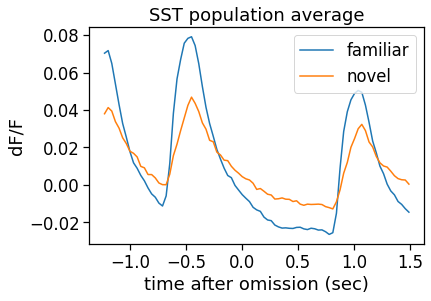

In [ ]:
timestamps = sst_data.trace_timestamps.values[0] 
for exposure_level in sst_data.exposure_level.unique():
    traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
    plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()

Plot population average omission response of VIP cells for familiar and novel images

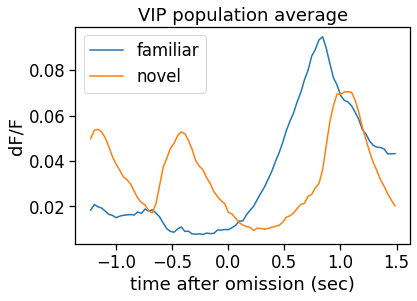

In [ ]:
timestamps = vip_data.trace_timestamps.values[0] # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
    traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
    plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()

Does the omission response correlate with behavior? 

How do the dynamics of image and omission evoked activity change over time during the novel image session? 

### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here: 

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here: 

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


